In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df_resultant = pd.read_csv(os.path.join(os.path.expanduser('~/ShortcutGrammar'), 'Resultant_DataFrame.csv'))
df_resultant.head()

,id,text,average_pvi,average_el2n,misclassification_number,sexist,numeric_labels,tree
0,2651,SIIIIGH http://t.co/BpJX5JwhlH,0.134662,0.043008,0,False,0,(25\n (44 [UNK])\n (25\n (7\n (24\n (5 (23 (43 http) (79 :)) (5 (31 (72 /) (72 /)) (54 t)))\n (74 .))\n (66 co))\n (13 (72 /) (50 [UNK]))))
1,6089,I really dislike working with undergrads in lab. Can I have my socially inept grad students back?,0.050947,0.119459,0,False,0,(25\n (27\n (27\n (14\n (1 (68 i) (21 (81 really) (32 dislike)))\n (2 (73 working) (15 (52 with) (60 [UNK]))))\n (15 (52 in) (60 [UNK])))\n (16\n (49 .)\n (14\n (80 can)\n (14\n (8 (68 i) (32 have))\n (2\n (2\n (11\n (11 (11 (86 my) (88 socially)) (88 inept))\n (88 grad))\n (41 students))\n (35 back))))))\n (85 ?))
2,9786,"So calling qualified hires ""tokens"" b/c it's not enough is harmful to progress. It reinforces what we already feel around us. It’s an attack",0.065549,0.104858,0,False,0,"(25\n (27\n (27\n (27\n (27\n (3 (92 so) (14 (8 (34 calling) (39 qualified)) (51 [UNK])))\n (16\n (49 "")\n (14\n (8\n (29\n (29\n (29 (29 (51 [UNK]) (35 "")) (35 b))\n (15 (72 /) (78 c)))\n (15\n (8 (8 (65 it) (26 (89 ') (70 s))) (81 not))\n (46 enough)))\n (77 is))\n (51 [UNK]))))\n (15 (91 to) (59 progress)))\n (16\n (49 .)\n (14\n (8 (57 it) (56 [UNK]))\n (2 (38 what) (14 (68 we) (19 (81 already) (61 feel)))))))\n (15 (52 around) (59 us)))\n (15\n (74 .)\n (14 (8 (65 it) (26 (89 ’) (70 s))) (2 (86 an) (48 attack)))))"
3,10635,Noooooo #mkr whyyyyy,0.136266,0.041448,0,False,0,(25 (44 [UNK]) (28 (30 (36 #) (75 mkr)) (50 [UNK])))
4,9749,I don't know ANY genuine female nerds... who watch The View. #Thor,-0.418783,0.439067,1,False,0,(25\n (17\n (28\n (27\n (27\n (27\n (1 (68 i) (21 (63 don) (10 (89 ') (9 (54 t) (61 know)))))\n (29 (11 (11 (86 any) (88 [UNK])) (88 female)) (51 [UNK])))\n (15 (74 .) (74 .)))\n (16\n (49 .)\n (14 (68 who) (19 (61 watch) (29 (86 the) (82 view))))))\n (74 .))\n (36 #))\n (75 thor))


In [3]:
df_resultant.shape

(9540, 8)

In [9]:
## let us check whether the patterns that are closely
df_sexism_roots = pd.read_csv(os.path.join(os.path.expanduser('~/ShortcutGrammar'), 'sexist_roots.csv'))

In [15]:
examples = list(map(str.strip, df_sexism_roots.iloc[0]['Examples'].split(',')))

In [ ]:
def get_subframes(df, example):
    

In [ ]:
df_res_sexist

In [16]:
example = examples[0]
example

'a girl'

In [17]:
df_res_sexist = df_resultant[(df_resultant['text'].str.contains(f'{example}')) & (df_resultant['sexist'] == True)]

In [18]:
df_res_sexist.shape

(63, 8)

In [19]:
df_res_sexist.iloc[1]['text']

'MENTION2624 You are such a big keedha of cricket. Very rare for a girl...how you get it?'

In [20]:
df_res_sexist[df_res_sexist['misclassification_number'] >= 4].shape

(31, 8)

In [21]:
df_res_sexist[df_res_sexist['misclassification_number'] < 4].shape

(32, 8)

In [22]:
df_res_non_sexist = df_resultant[(df_resultant['text'].str.contains(f'{example}')) & (df_resultant['sexist'] == False)]

In [23]:
df_res_non_sexist.shape

(46, 8)

In [24]:
df_non_sexist_misclassified = df_res_non_sexist[df_res_non_sexist['misclassification_number'] >= 4].reset_index(drop = True)

In [25]:
df_non_sexist_misclassified

,id,text,average_pvi,average_el2n,misclassification_number,sexist,numeric_labels,tree
0,2583,There is no particular reason why a girl standing in a crowded street car should expect a man to offer her his seat,-1.132517,0.840783,5,False,0,(25\n (14\n (8 (57 there) (77 is))\n (2 (11 (86 no) (88 particular)) (41 reason)))\n (3\n (92 why)\n (14\n (8\n (29\n (29 (86 a) (82 girl))\n (14\n (37 standing)\n (15\n (52 in)\n (29 (11 (11 (86 a) (88 [UNK])) (88 street)) (41 car)))))\n (77 should))\n (2\n (2 (87 expect) (29 (86 a) (82 man)))\n (6\n (91 to)\n (2 (87 offer) (29 (11 (86 her) (88 his)) (41 seat))))))))
1,7300,There is no particular reason why a girl standing in a crowded vehicle or building should expect a man to offer her his seat,-1.153466,0.847360,5,False,0,(25\n (14\n (8 (57 there) (77 is))\n (2 (11 (86 no) (88 particular)) (41 reason)))\n (3\n (92 why)\n (14\n (8\n (29\n (29 (86 a) (82 girl))\n (14\n (14\n (37 standing)\n (15 (52 in) (29 (11 (86 a) (88 [UNK])) (41 vehicle))))\n (15 (52 or) (59 building))))\n (77 should))\n (2\n (2 (87 expect) (29 (86 a) (82 man)))\n (6\n (91 to)\n (2 (87 offer) (29 (11 (86 her) (88 his)) (41 seat))))))))


In [26]:
df_non_sexist_correct = df_res_non_sexist[df_res_non_sexist['misclassification_number'] < 4].reset_index(drop = True)

In [16]:
df_pairs = pd.read_csv(os.path.join(os.path.expanduser('~/ShortcutGrammar'), 'sexism_paired.csv'), delimiter = '\t')

In [17]:
df_pairs

,Unnamed: 0,original_id,counterfactual_id,negation_additions,negation_deletions,affect word_additions,affect word_deletions,gender word_additions,gender word_deletions,identity word_additions,identity word_deletions,hedges_additions,hedges_deletions,hate words_additions,hate words_deletions
0,0,9520.0,1981.0,False,True,True,True,False,True,False,False,False,False,False,False
1,1,5542.0,13519.0,False,False,False,False,False,True,False,False,False,False,False,False
2,2,1474.0,12619.0,False,False,False,False,False,False,False,False,False,False,False,False
3,3,10641.0,13521.0,False,False,False,False,False,True,False,False,False,False,False,False
4,4,3700.0,6317.0,False,False,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,907,13219.0,4760.0,False,False,False,False,False,True,False,False,False,False,False,False
908,908,14.0,12694.0,False,False,False,False,False,False,False,False,False,False,False,False
909,909,3586.0,1493.0,True,True,False,False,False,False,False,False,False,False,False,False
910,910,8718.0,2789.0,False,True,False,False,False,False,False,False,False,False,False,False


In [18]:
df_pair_trees = pd.merge(df_pairs, df_non_sexist_misclassified, left_on = 'counterfactual_id', right_on = 'id', how  = 'inner')

In [19]:
df_pair_trees

,Unnamed: 0,original_id,counterfactual_id,negation_additions,negation_deletions,affect word_additions,affect word_deletions,gender word_additions,gender word_deletions,identity word_additions,identity word_deletions,hedges_additions,hedges_deletions,hate words_additions,hate words_deletions,id,text,average_pvi,average_el2n,misclassification_number,sexist,numeric_labels,tree


In [37]:
df_pair_trees.to_csv('counterfactual_pairs.csv')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
def plot_datapoints_sexist(dataset, type_data):
           
    sns.set_theme(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
    fig.tight_layout()
    bins = np.arange(-2, 3, 0.3)
    df_subset = None
    correct = dataset[dataset['misclassification_number'] < 4].reset_index(drop = True)
    incorrect = dataset[dataset['misclassification_number']  >=4].reset_index(drop = True)
    correct_pvi, incorrect_pvi = correct['average_pvi'], incorrect['average_pvi']
    correct_el2n, incorrect_el2n = correct['average_el2n'], incorrect['average_el2n']
    ax1.hist(data = correct, x = 'average_pvi', weights=np.ones_like(correct_pvi)/len(correct_pvi), label=f'correct',
           bins = bins, alpha=0.4, color='tab:blue')
    ax1.hist(data = incorrect, x = 'average_pvi', weights=np.ones_like(incorrect_pvi)/len(incorrect_pvi), label=f'incorrect',
           bins = bins, alpha=0.4, color='tab:red')
    ax1.legend(loc = 'best',fontsize = 10)
    ax2.hist(correct_el2n, weights=np.ones_like(correct_el2n)/len(correct_el2n), label=f'correct', 
            bins = bins, alpha=0.4, color='tab:blue')
    ax2.hist(incorrect_el2n, weights=np.ones_like(incorrect_el2n)/len(incorrect_el2n), label=f'incorrect',
            bins = bins, alpha=0.4, color='tab:red')
    ax2.legend(loc = 'best',fontsize = 10)
    ax1.vlines(dataset['average_pvi'].mean(), 0, 4, linestyles='dashed', color='black', alpha = 0.2)
    ax1.set_ylabel('Proportion of Examples')
    ax1.set_xlabel('PVI (higher $\leftrightarrow$ easier)', fontsize=11)
    ax1.set_ylim([0, 1])
    ax2.set_xlabel('EL2N (higher $\leftrightarrow$ harder)', fontsize=11)
    ax2.vlines(dataset['average_el2n'].mean(), 0, 3, linestyles='dashed', color='black')
    ax2.set_ylim([0, 1])
    ax1.grid(axis='x')
    ax2.grid(axis='x')
    plt.show()
    

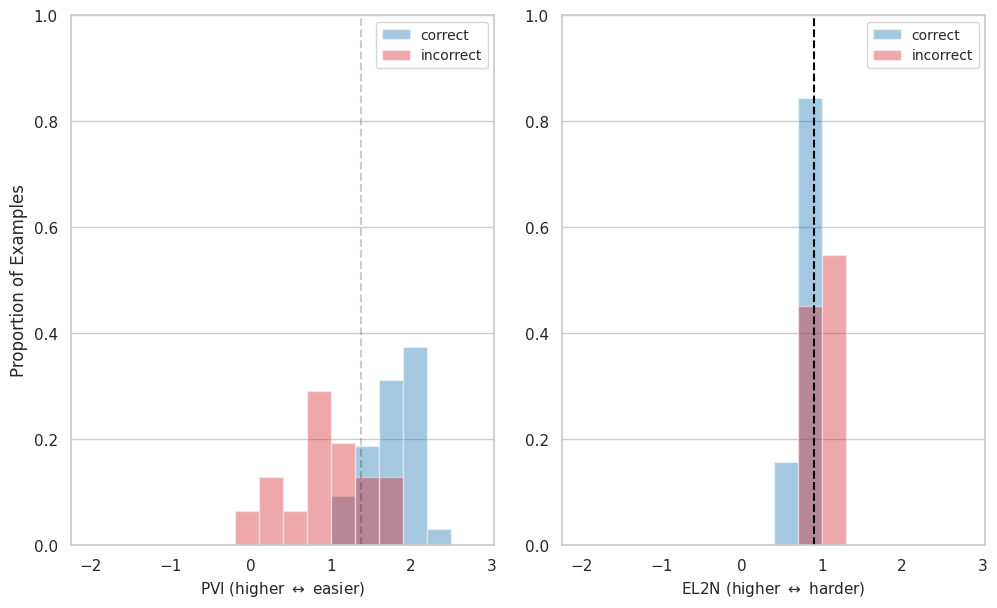

In [22]:
plot_datapoints_sexist(dataset = df_res_sexist, type_data = 'sexist')

In [23]:
def plot_datapoints_non_sexist(dataset, type_data):
           
    sns.set_theme(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
    fig.tight_layout()
    bins = np.arange(-2, 3, 0.3)
    correct = dataset[dataset['misclassification_number'] < 4].reset_index(drop = True)
    incorrect = dataset[dataset['misclassification_number']  >= 4].reset_index(drop = True)
    correct_pvi, incorrect_pvi = correct['average_pvi'], incorrect['average_pvi']
    correct_el2n, incorrect_el2n = correct['average_el2n'], incorrect['average_el2n']
    ax1.hist(data = correct, x = 'average_pvi', weights=np.ones_like(correct_pvi)/len(correct_pvi), label=f'correct',
           bins = bins, alpha=0.4, color='tab:blue')
    ax1.hist(data = incorrect, x = 'average_pvi', weights=np.ones_like(incorrect_pvi)/len(incorrect_pvi), label=f'incorrect',
           bins = bins, alpha=0.4, color='tab:red')
    ax1.legend(loc = 'best',fontsize = 10)
    ax2.hist(correct_el2n, weights=np.ones_like(correct_el2n)/len(correct_el2n), label=f'correct', 
            bins = bins, alpha=0.4, color='tab:blue')
    ax2.hist(incorrect_el2n, weights=np.ones_like(incorrect_el2n)/len(incorrect_el2n), label=f'incorrect',
            bins = bins, alpha=0.4, color='tab:red')
    ax2.legend(loc = 'best',fontsize = 10)
    ax1.vlines(dataset['average_pvi'].mean(), 0, 4, linestyles='dashed', color='black', alpha = 0.2)
    ax1.set_ylabel('Proportion of Examples')
    ax1.set_xlabel('PVI (higher $\leftrightarrow$ easier)', fontsize=11)
    ax1.set_ylim([0, 1])
    ax2.set_xlabel('EL2N (higher $\leftrightarrow$ harder)', fontsize=11)
    ax2.vlines(dataset['average_el2n'].mean(), 0, 3, linestyles='dashed', color='black')
    ax2.set_ylim([0, 1])
    ax1.grid(axis='x')
    ax2.grid(axis='x')
    plt.show()
    

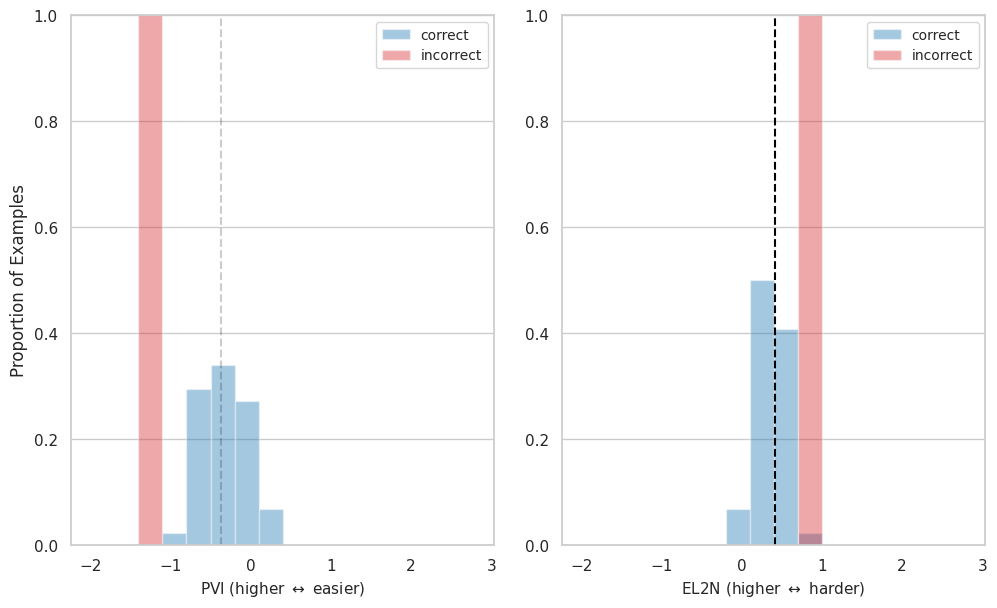

In [24]:
plot_datapoints_non_sexist(dataset = df_res_non_sexist, type_data = 'non_sexist')